In [1]:
# Import the dependencies.
#Data science
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn =engine.connect()

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session= Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = "SELECT max(date) FROM measurement"
with engine.connect() as conn:
    print(conn.execute(text(recent_date)).fetchall())

[('2017-08-23',)]


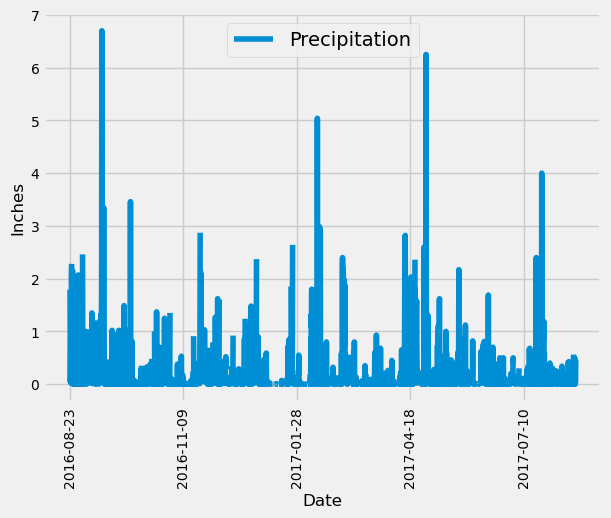

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_scores = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >=year_ago)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
date_prcp_df = pd.DataFrame(precipitation_scores, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
date_prcp_df = date_prcp_df .sort_values("Date")

# Use Pandas Plotting with Matplotlib to plot the data
date_prcp_df.plot(x="Date", y="Precipitation", rot=90, fontsize=10)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Inches", fontsize=12)

# Save the plot as an image file (e.g., PNG format)
plt.savefig('outputs/precipitation_plot.png')

# Display the plot 
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
date_prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
total_stations= session.query(func.count(Station.station)).scalar()
print (total_stations)
print(f"Total number of stations: {total_stations}")

9
Total number of stations: 9


In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
counts = session.query(Measurement.station, func.count(Measurement.station)).\
 group_by(Measurement.station).\
 order_by(func.count(Measurement.station).desc())

# Print the stations and their observation counts in descending order
counts_df = pd.read_sql(counts.statement, session.bind)  
counts_df

,station,count_1
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# declarate Most active station
most_active_station = counts_df.iloc[0,0]

results = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                 filter(Measurement.station == most_active_station).\
                 all()

# Extract the results
lowest_temp, highest_temp, avg_temp = results[0]

print(f'Most Active Station ID: {most_active_station}')
print(f'Lowest Temperature: {lowest_temp}')
print(f'Highest Temperature: {highest_temp}')
print(f'Average Temperature: {avg_temp}')

Most Active Station ID: USC00519281
Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66378066378067


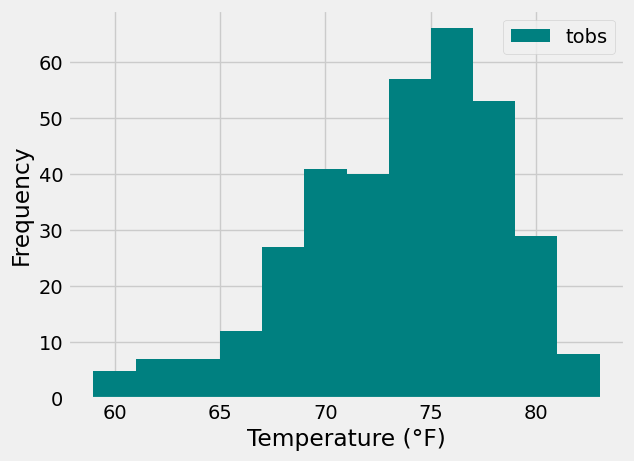

In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Results = session.query(Measurement.tobs).filter(Measurement.station == most_active_station).filter(Measurement.date >= year_ago).all()
df = pd.DataFrame(Results, columns = ['tobs'])
df.plot.hist(bins = 12, color='teal')
plt.xlabel("Temperature (°F)")

# Save the plot as an image file (e.g., PNG format)
plt.savefig('outputs/Temperature_plot.png')

# Display the plot 
plt.show()

# Close Session

In [23]:
# Close Session
session.close()